Training set --> Dividing the data set --> Test set --> The model being trained --> Test set applied --> Model identifies number in images 

-------------------------------------------------------------------------------
***Peroject 3 :-***

*Predicting Numbers*

In [ ]:
# Importing the Libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

digits = load_digits()

-----------------------------------------------------------------
Here we will visualize the shape of digits

In [ ]:

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


-------------------------------------------------
Now we will take a look some of sample images which we have loaded 


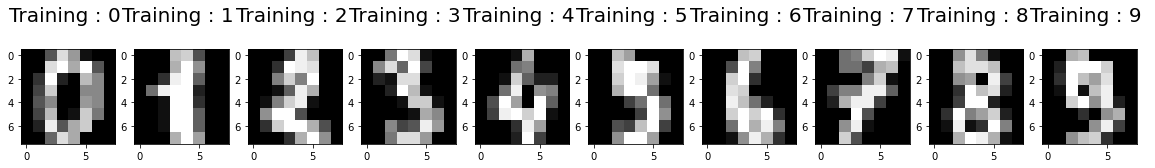

In [ ]:
plt.figure(figsize = (20,4))
for index, (image,label) in enumerate(zip(digits.data[0:10], digits.target[0:10])) :
  plt.subplot(1,10, index + 1)
  plt.imshow(np.reshape(image,(8,8)), cmap = plt.cm.gray)
  plt.title('Training : %i \n' %label, fontsize = 20)

----------------------------------------------------------------------
Based on this now will train our Logistic Regression Model and then we will test it and see how will it is able to recognize.
As you can see here this is an 8 by 8 pixel kind of an image and the each pixel is activated or not activated, that is the information available
for each pixel now based on the pattern of this activation and non-activation of the various pixels, this will be identified 0,1,2, and more as you can see 
So each of the number has a different pattern of the pixel activation.
that's what a model need to learn for which a number.
so that is what we are going to train our model.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state = 2)

In [ ]:
print(x_train.shape)

(1437, 64)


In [ ]:
print(y_train.shape)

(1437,)


In [ ]:
print(x_test.shape)

(360, 64)


In [ ]:
print(y_test.shape)

(360,)


-------------------------------------------------------------------
Then we Import the Logistic Regression Library which is a part of scikit learn so we don't have to implement the logistic regression process, itself we just call these LogisticRegression().

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating an instance of LogisticRegression()
logisticRegression = LogisticRegression()

#and in this instance we are passing x_train & y_train and we are training our data model.
logisticRegression.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

--------------------------------------------------------------------
Returns a NumPy Array
Predict for One Observation (image)

In [ ]:
print(logisticRegression.predict(x_test[0].reshape(1, -1)))

[4]


In [ ]:
logisticRegression.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [ ]:
predictions = logisticRegression.predict(x_test)

In [ ]:
# we use score method to find what is the percentages of accuracy.
score = logisticRegression.score(x_test, y_test)
print(score)

0.9444444444444444


We can also see this accuracy using confusion matrix

In [ ]:
# y_test , these are the labeled values which we already know for the test dataset and predictions are what 
# system is predicted for the test dataset
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  2  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]


This is how the confusion matrix looks as the name suggests it is a matrix and the key point here is that accuracy of the model is determined by how many numbers are there in diagonal , the more the numbers in diagonal the better the accuray is and the total sum of all the numbers in this whole matrix is equal to the number of observations in the test data set. and then maximum number shoud be in the diagonal, that means the accuracy is pretty good. 

Text(0.5, 1.0, 'Accuracy Score : 0.9444444444444444')

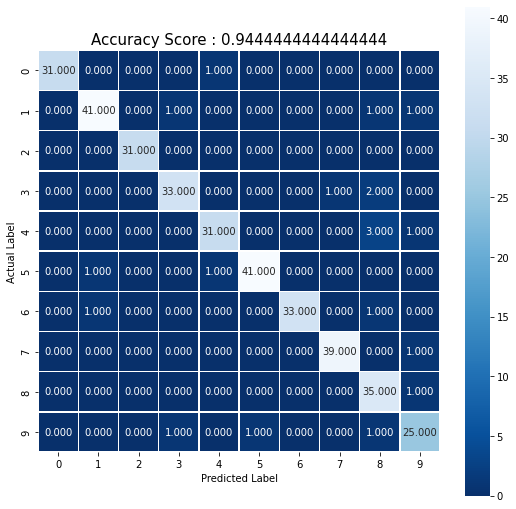

In [ ]:
# Visualizing the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title, size = 15)

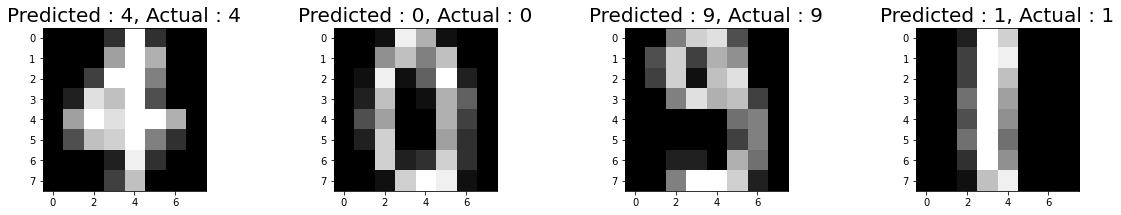

In [ ]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test) :
  if predict == actual :
    classifiedIndex.append(index)
  index +=1

plt.figure(figsize = (20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]) :
  plt.subplot(1,4,plotIndex + 1)
  plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
  plt.title('Predicted : {}, Actual : {}'.format(predictions[wrong], y_test[wrong]), fontsize=20)